In [23]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Check available styles and use the most similar to seaborn
print("Available matplotlib styles:", plt.style.available)
plt.style.use('ggplot')  # Using ggplot style instead of seaborn

# Set color palette
sns.set_palette("husl")

# Upload the dataset
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# Data cleaning
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('₹','').replace(',','').strip())
    return x

df['discounted_price'] = df['discounted_price'].apply(clean_currency)
df['actual_price'] = df['actual_price'].apply(clean_currency)
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].astype(str).str.replace(',','').astype(float)

# Custom display function
def pretty_print(title, df_or_series, is_df=False):
    display(HTML(f"<h3 style='color:#2B547E;'>{title}</h3>"))
    if is_df:
        display(df_or_series.style.background_gradient(cmap='Blues'))
    else:
        display(df_or_series.to_frame().style.background_gradient(cmap='Greens'))

Available matplotlib styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Saving amazon.csv to amazon (7).csv


,rating
category,
Computers&Accessories|Tablets,4.600000
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.500000
Electronics|Cameras&Photography|Accessories|Film,4.500000
Computers&Accessories|Components|Memory,4.500000
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.500000
OfficeProducts|OfficeElectronics|Calculators|Basic,4.500000
HomeImprovement|Electrical|CordManagement,4.500000
"Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeePresses",4.500000
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories,4.500000


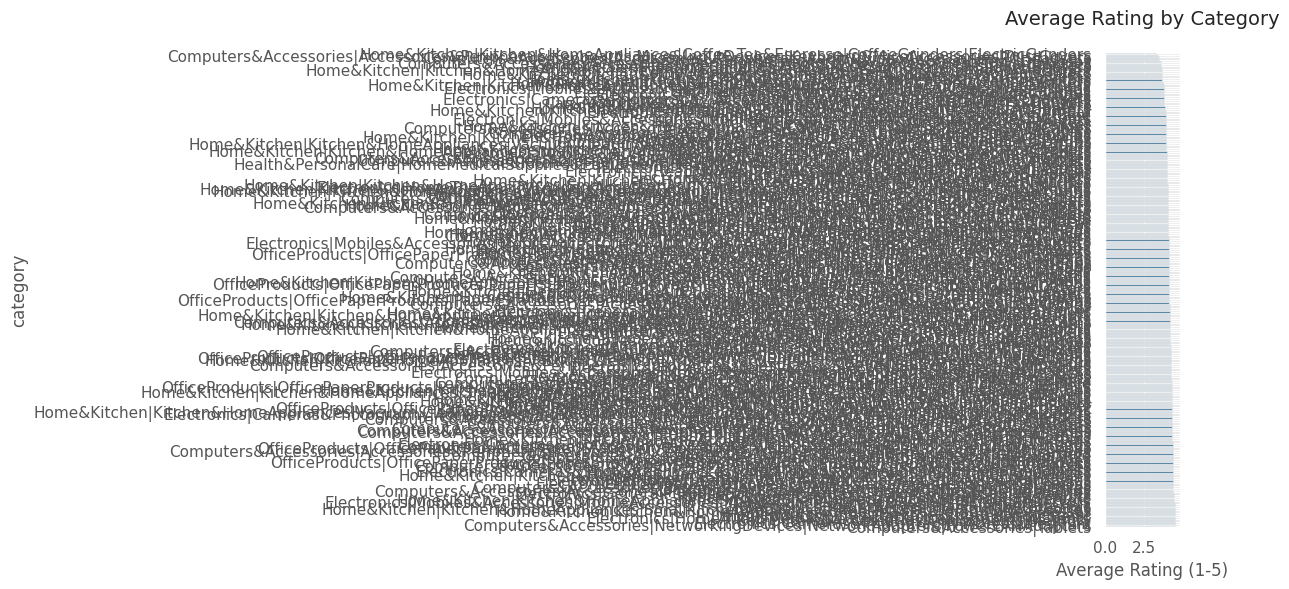

In [24]:

# ===== Q1: Average rating by category =====
q1 = df.groupby('category')['rating'].mean().sort_values(ascending=False).round(2)
pretty_print("🔹 Q1. Average Rating by Product Category", q1)

plt.figure(figsize=(12,6))
q1.plot(kind='barh', color='#5D8AA8')
plt.title('Average Rating by Category', pad=20, fontsize=14)
plt.xlabel('Average Rating (1-5)')
plt.tight_layout()
plt.show()

In [28]:
# Corrected pretty_print function
def pretty_print(title, df_or_series, is_df=False):
    display(HTML(f"<h3 style='color:#2B547E;'>{title}</h3>"))
    if isinstance(df_or_series, pd.io.formats.style.Styler):
        display(df_or_series)
    elif is_df:
        display(df_or_series.style.background_gradient(cmap='Blues'))
    else:
        display(df_or_series.to_frame().style.background_gradient(cmap='Greens'))

# ===== Q2: Top products by rating_count (fixed version) =====
q2 = (df.groupby(['category', 'product_name'])['rating_count']
      .max()
      .sort_values(ascending=False)
      .groupby('category')
      .head(1)
      .reset_index()
      .sort_values('rating_count', ascending=False))

q2_formatted = q2[['category', 'product_name', 'rating_count']].head(10)
styled_q2 = q2_formatted.style.format({'rating_count': '{:,.0f}'}).background_gradient(cmap='Blues')

pretty_print("🔹 Q2. Top Rated Products by Category (Highest rating_count)", styled_q2)

,category,product_name,rating_count
0,"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables","Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black","426,973"
1,"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink),"363,713"
2,Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage) | Octa-core Helio G35 | 5000 mAh Battery","313,836"
3,Home&Kitchen|Kitchen&Dining|KitchenTools|ManualChoppers&Chippers|Choppers,"Pigeon Polypropylene Mini Handy and Compact Chopper with 3 Blades for Effortlessly Chopping Vegetables and Fruits for Your Kitchen (12420, Green, 400 ml)","270,563"
4,Computers&Accessories|ExternalDevices&DataStorage|PenDrives,SanDisk Cruzer Blade 32GB USB Flash Drive,"253,105"
5,Electronics|Accessories|MemoryCards|MicroSD,SanDisk Extreme SD UHS I 64GB Card for 4K Video for DSLR and Mirrorless Cameras 170MB/s Read & 80MB/s Write,"205,052"
6,Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters,"TP-Link Nano USB WiFi Dongle 150Mbps High Gain Wireless Network Wi-Fi Adapter for PC Desktop and Laptops, Supports Windows 10/8.1/8/7/XP, Linux, Mac OS X (TL-WN722N)","179,692"
7,Electronics|Mobiles&Accessories|MobileAccessories|Chargers|PowerBanks,MI Power Bank 3i 20000mAh Lithium Polymer 18W Fast Power Delivery Charging | Input- Type C | Micro USB| Triple Output | Sandstone Black,"178,912"
8,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"Amazon Basics USB A to Lightning MFi Certified Charging Cable (White, 1.2 meter)","178,817"
9,Computers&Accessories|NetworkingDevices|Repeaters&Extenders,"TP-Link TL-WA850RE Single_Band 300Mbps RJ45 Wireless Range Extender, Broadband/Wi-Fi Extender, Wi-Fi Booster/Hotspot with 1 Ethernet Port, Plug and Play, Built-in Access Point Mode, White","156,638"


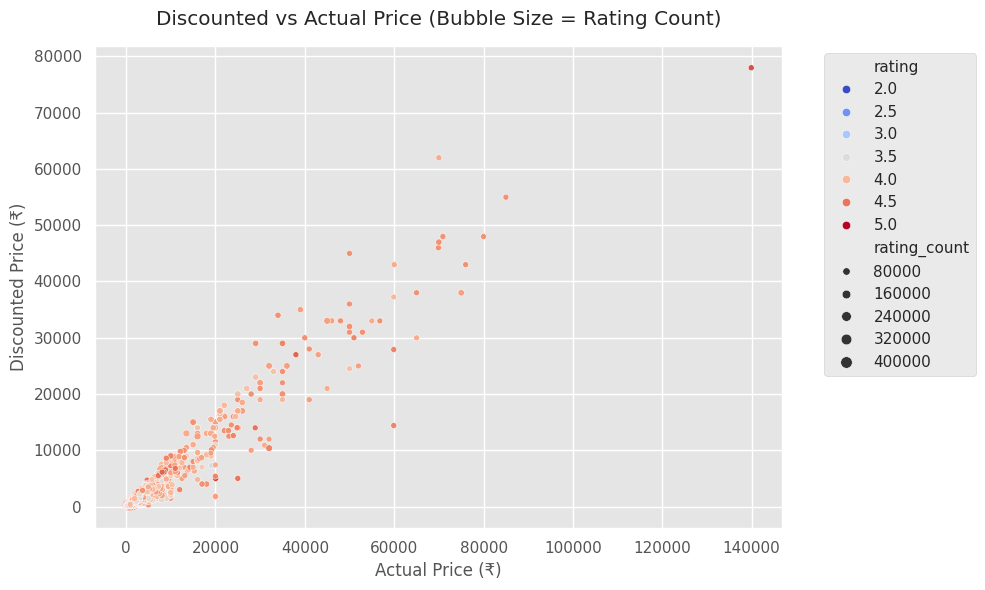

In [29]:
# ===== Q3: Price distribution =====
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='actual_price', y='discounted_price',
                hue='rating', palette='coolwarm', size='rating_count')
plt.title('Discounted vs Actual Price (Bubble Size = Rating Count)', pad=15)
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
# ===== Q4: Discount % by category =====
q4 = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False).round(1)
pretty_print("🔹 Q4. Average Discount Percentage by Category", q4)

,discount_percentage
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,90.000000
"Electronics|Headphones,Earbuds&Accessories|Earpads",90.000000
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,90.000000
"Electronics|Headphones,Earbuds&Accessories|Adapters",88.000000
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers",87.500000
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts,82.000000
Computers&Accessories|Components|InternalHardDrives,80.000000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,78.500000
Electronics|Mobiles&Accessories|MobileAccessories|Stands,76.400000


In [31]:
# ===== Q5: Most popular products =====
q5 = (df.groupby('product_name')['rating_count']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .to_frame())
pretty_print("🔹 Q5. Top 10 Popular Products by Rating Count",
             q5.style.format({'rating_count': '{:,.0f}'}))

,rating_count
product_name,
"AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot","853,945"
"Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black","426,973"
"Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black","426,973"
"JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)","385,177"
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink),"363,713"
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red),"363,713"
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black),"363,711"
"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery","313,836"
"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage) | Octa-core Helio G35 | 5000 mAh Battery","313,836"


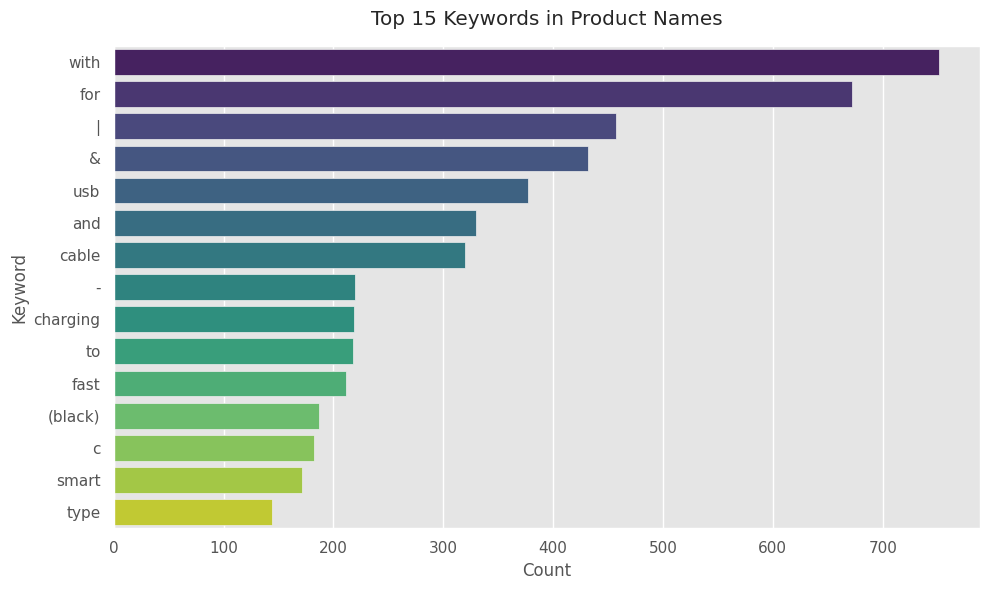

In [32]:
# ===== Q6: Product keywords =====
from collections import Counter
keywords = Counter(" ".join(df['product_name'].dropna()).lower().split()).most_common(15)
q6 = pd.DataFrame(keywords, columns=['Keyword', 'Count']).set_index('Keyword')

plt.figure(figsize=(10,6))
sns.barplot(y=q6.index, x='Count', data=q6, palette='viridis')
plt.title('Top 15 Keywords in Product Names', pad=15)
plt.tight_layout()
plt.show()

In [34]:
# Final corrected pretty_print function
def pretty_print(title, df_or_series, is_df=False):
    display(HTML(f"<h3 style='color:#2B547E;'>{title}</h3>"))
    if isinstance(df_or_series, pd.io.formats.style.Styler):
        display(df_or_series)
    elif isinstance(df_or_series, pd.DataFrame):
        display(df_or_series.style.background_gradient(cmap='Blues'))
    else:  # For Series
        display(df_or_series.to_frame().style.background_gradient(cmap='Greens'))

# ===== Q7: Fixed implementation =====
df['review_length'] = df['review_content'].str.len()
q7 = df.nlargest(5, 'review_length')[['product_name', 'review_length']]
styled_q7 = q7.style.background_gradient(cmap='Blues')

pretty_print("🔹 Q7. Products with Longest Reviews", styled_q7)

,product_name,review_length
1056,Philips GC1905 1440-Watt Steam Iron with Spray (Blue),18547
656,"Boult Audio Probass Curve Bluetooth Wireless in Ear Earphones with Mic with Ipx5 Water Resistant, 12H Battery Life & Extra Bass (Black)",14699
41,Mi 108 cm (43 inches) Full HD Android LED TV 4C | L43M6-INC (Black),13253
718,SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive (Black),13239
420,"boAt Xtend Smartwatch with Alexa Built-in, 1.69” HD Display, Multiple Watch Faces, Stress Monitor, Heart & SpO2 Monitoring, 14 Sports Modes, Sleep Monitor, 5 ATM & 7 Days Battery(Pitch Black)",11925


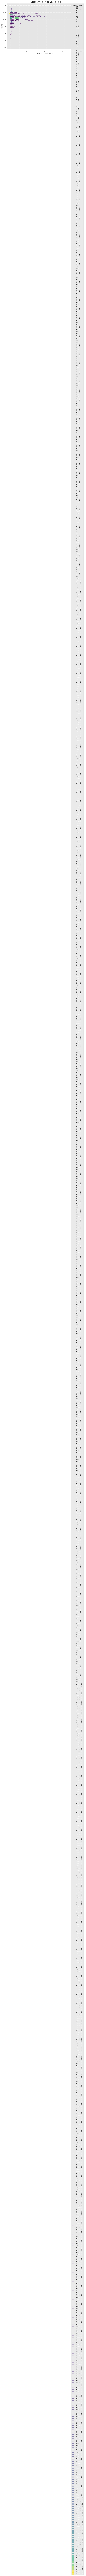

In [39]:
# ===== Q8: Price-Rating correlation =====
corr = df[['discounted_price', 'rating']].corr().iloc[0,1]

display(HTML(
    f"<h3 style='color:#2B547E;'>🔹 Q8. Correlation Between Discounted Price and Rating</h3>"
    f"<div style='font-size:18px; padding:10px; background-color:#E1EBEE;'>"
    f"Correlation coefficient between the discounted price of a product and its average rating:"
    f"</div>"
))
display(HTML(
    f"<div style='font-size:22px; padding:15px; background-color:#DBE4E7; border-left: 5px solid #2B547E;'>"
    f"Correlation coefficient: <b>{corr:.2f}</b><br>"
    f"<span style='font-size:16px;'>(Interpretation: 0 = no correlation, 1 = perfect positive correlation, -1 = perfect negative correlation)</span>"
    f"</div>"
))

# Scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df, alpha=0.6, s=50, hue='rating_count', size='rating_count', sizes=(20, 400), palette='viridis', legend='full')
plt.title('Discounted Price vs. Rating', fontsize=16)
plt.xlabel('Discounted Price (₹)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
# ===== Q9: Top 5 categories =====
q9 = (df.groupby('category')['rating']
      .mean()
      .sort_values(ascending=False)
      .head(5)
      .round(2))
pretty_print("🔹 Q9. Top 5 Categories by Highest Average Rating", q9)

,rating
category,
Computers&Accessories|Tablets,4.600000
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.500000
Electronics|Cameras&Photography|Accessories|Film,4.500000
Computers&Accessories|Components|Memory,4.500000
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.500000


In [38]:
# ===== Q10: Improvement suggestions =====
display(HTML(
    """
    <h3 style='color:#2B547E;'>🔹 Q10. Potential Areas for Improvement</h3>
    <ol style='font-size:14px; line-height:1.8;'>
        <li><b>Low-rated categories:</b> Focus quality improvements on categories with average rating below 3.5</li>
        <li><b>High-discount, low-rating products:</b> Investigate if deep discounts are compensating for poor quality</li>
        <li><b>Review analysis:</b> Perform sentiment analysis on lengthy reviews to identify common complaints</li>
        <li><b>Pricing strategy:</b> Categories with weak price-rating correlation may need repricing</li>
        <li><b>Popular keywords:</b> Leverage frequently appearing keywords in product listings and ads</li>
    </ol>
    """
))